## Twitter Wordcloud

### Before we begin 

Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (RED)](https://kb.iu.edu/d/apum). You will also need to have access to RED through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-R.ipynb](textPrep-R.ipynb) before you proceed further. The textPrepPy notebook provides information and resources on how to get a Carbonate account, how to set up RED, and how to get started using the Jupyter Notebook on RED.

### Let's get started

First, we need to set our working directory (setwd). This is the folder that points to where your data is stored. In our case we have multiple folders that we may want to use at some point, but they are all contained in our Text-Analysis folder, so we will set that as our working directory.

In [1]:
setwd("~/Text-Analysis")

#### Include necessary packages for notebook 

R's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of R, others created by R users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In R Studio, packages can be installed by navigating to Tools in the menu bar > Install Packages. Or in the bottom right panel click on the "packages" tab and then click on "install."

- **wordcloud:** Plots wordclouds.
- **tm:** this package provides tools (functions) for performing various types of text mining. In this script, we will use tm to performing text cleaning in order to have uniform data for analysis. Check out [this link](https://cran.r-project.org/web/packages/tm/vignettes/tm.pdf) for the documentation!

In [2]:
library(wordcloud)
library(tm)

Loading required package: RColorBrewer
Loading required package: NLP


Here we add a line for extracting a .zip file. If you downloaded this from our GitHub repository, some of the twitter data was too large to load without compressing it down to a .zip file, and this block of code will extract the file. Although, this step may not be needed as you can unzip files in the directory manually on Carbonate. However, if you prefer to just run the code and let it extract the file for you, then remove the # from the beginning of lines 2,3,and 4 below and run the code.

In [3]:
#unzip file
#zipF<- "data/twitter/neverAgain.csv.zip"
#outDir<-"data/twitter"
#unzip(zipF,exdir=outDir)

Read the .csv file (this time a curated set of tweets grabbed using the twitterR library and API authentication, then saved with the .RData extension, and converted to .csv using a different R script)

In [4]:
tweets <- read.csv("data/twitter/parkland/neverAgain.csv")

### Prepare text data

First we are going to take the list of 4000 tweets created when we grabbed the file above and convert it to utf-8 encoding, grabbing only the text column. We use 'iconv' to convert the column labeled 'text' found in our 'tweets' variable above (tweets$text) and then tell it we want to convert the text to = utf-8.

In [5]:
corpus <- iconv(tweets$text, to = "utf-8")

Let's look at the first few tweets:

In [6]:
head(corpus)

[1] "RT @canarymission: Students of Students for Justice in Palestine Mock the #Holocaust \n\n#NeverAgain #WeRemember\nhttps://t.co/cnPE7dEnik https://t.co/Xvd6IBiSPe"
[2] "RT @canarymission: Students of Students for Justice in Palestine Mock the #Holocaust \n\n#NeverAgain #WeRemember\nhttps://t.co/cnPE7dEnik https://t.co/Xvd6IBiSPe"
[3] "He duped so many #NeverAgain #MeToo https://t.co/7u4Vl5UjSR"                                                                                                      
[4] NA                                                                                                                                                                 
[5] NA                                                                                                                                                                 
[6] NA

Now we need to turn the text into a tm Corpus object:

In [7]:
corpus <- VCorpus(VectorSource(corpus))

Next, we need to eliminate any characters that are not UTF-8. If you know the encoding (in this case it usually is ASCII), then put it in the first set of quotes. If you do not, then just put another "UTF-8" so (x, "ASCII", "UTF-8", sub="") or (x, "UTF-8", "UTF-8", sub=""):

In [8]:
corpus <- tm_map(corpus,
                 content_transformer(function(x) iconv(x, "ASCII", "UTF-8", sub="")))

### Clean Text
Now we need to clean the text which is done as follows:

1. First we need to convert all the text to lower case, so that "Clinton" and "clinton" are not seen as seperate words.
2. Now we need to remove all punctuation so that only alphanumeric characters are read.
3. You may also wish to eliminate numbers, especially if they skew your results any, however, numbers may also be important, so that is why this one is optional.
4. Now we remove extra white space so what was "well said @emma4change" does not end up as "well said &nbsp;&nbsp;emma4change" but becomes "well said emma4change."
5. Now we need to remove url's so we don't end up with a lot of 'http', 'https', et cetera. We do this by creating a function that uses regular expressions to remove them and then apply that function to our "corpus."
6. It's time to remove stopwords. In our plain text wordcloud, we used tm's options for a wordlist and will be doing the same again. Concatenated onto the list are common twitter words not yet eliminated such as "rt" (retweet), "amp" (&), the subject of our tweets "neveragain", and popular twitter handles (emma4change, xokarminox) with the "@" removed.

In [9]:
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, stripWhitespace)
removeURL <- function(x) gsub("http[[:alnum:]]*", "", x)
corpus <- tm_map(corpus, content_transformer(removeURL))
corpus <- tm_map(corpus, removeWords, c(stopwords("SMART"),'amp','rt', 'neveragain', 'dont', 'will', 'see', 'emmachange', 'xokarminox'))

### Plot the wordcloud! 
There are a number of arguments you can customize: "scale" indicates the size of the words; "max.words" controls how many words show up in the wordcloud; and we've used the library "RColorBrewer" to give us access to some predefined palettes. Note that if you change the palette, you need to tell the argument how many colors are in the new palette. 

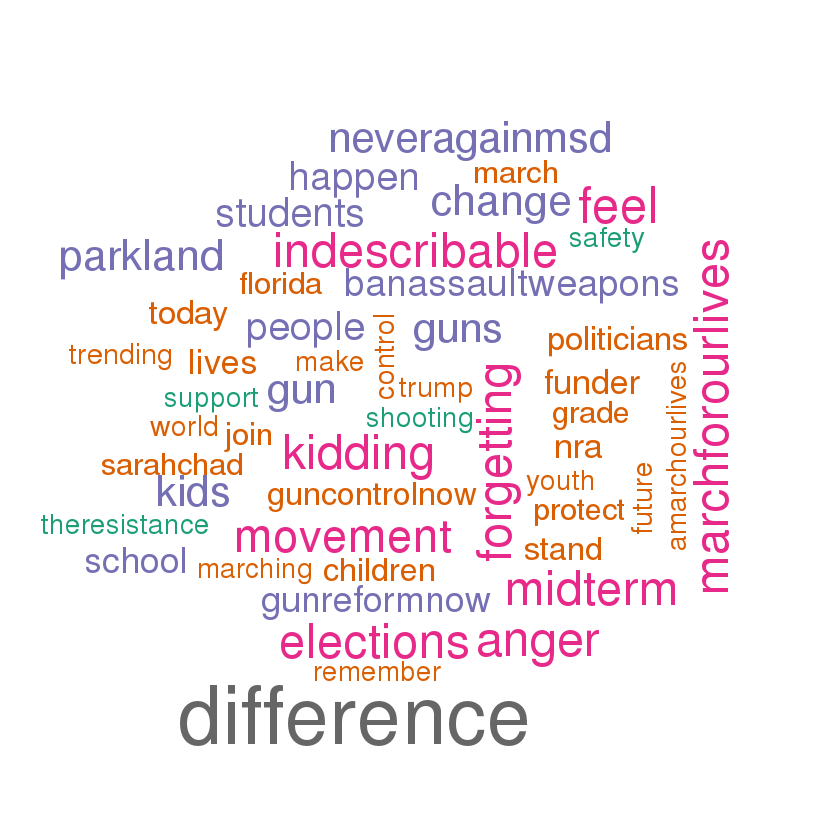

In [10]:
wordcloud(corpus, min.freq=10, max.words=50, scale=c(4,1), colors=brewer.pal(8, "Dark2"))

### VOILA!

Ackowledgements: This algorithm was adapted from the blog "Flumoxed by IT" by Hanxue Lee. This blog entry was posted March 11, 2016.
Reference: Hanxue Lee. (2016, March 11). Twitter Word Cloud Using R. Retrieved from http://flummox-engineering.blogspot.com/2016/03/twitter-word-cloud-using-r.html                           